In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
Image.MAX_IMAGE_PIXELS = None
from pathlib import Path

In [3]:
img_mean = (238, 231, 234)  # from all train data

In [8]:
data_dir = Path('/workspace/data/images_page_4_fixed/')
filenames = sorted(list(data_dir.glob('**/*.png')))

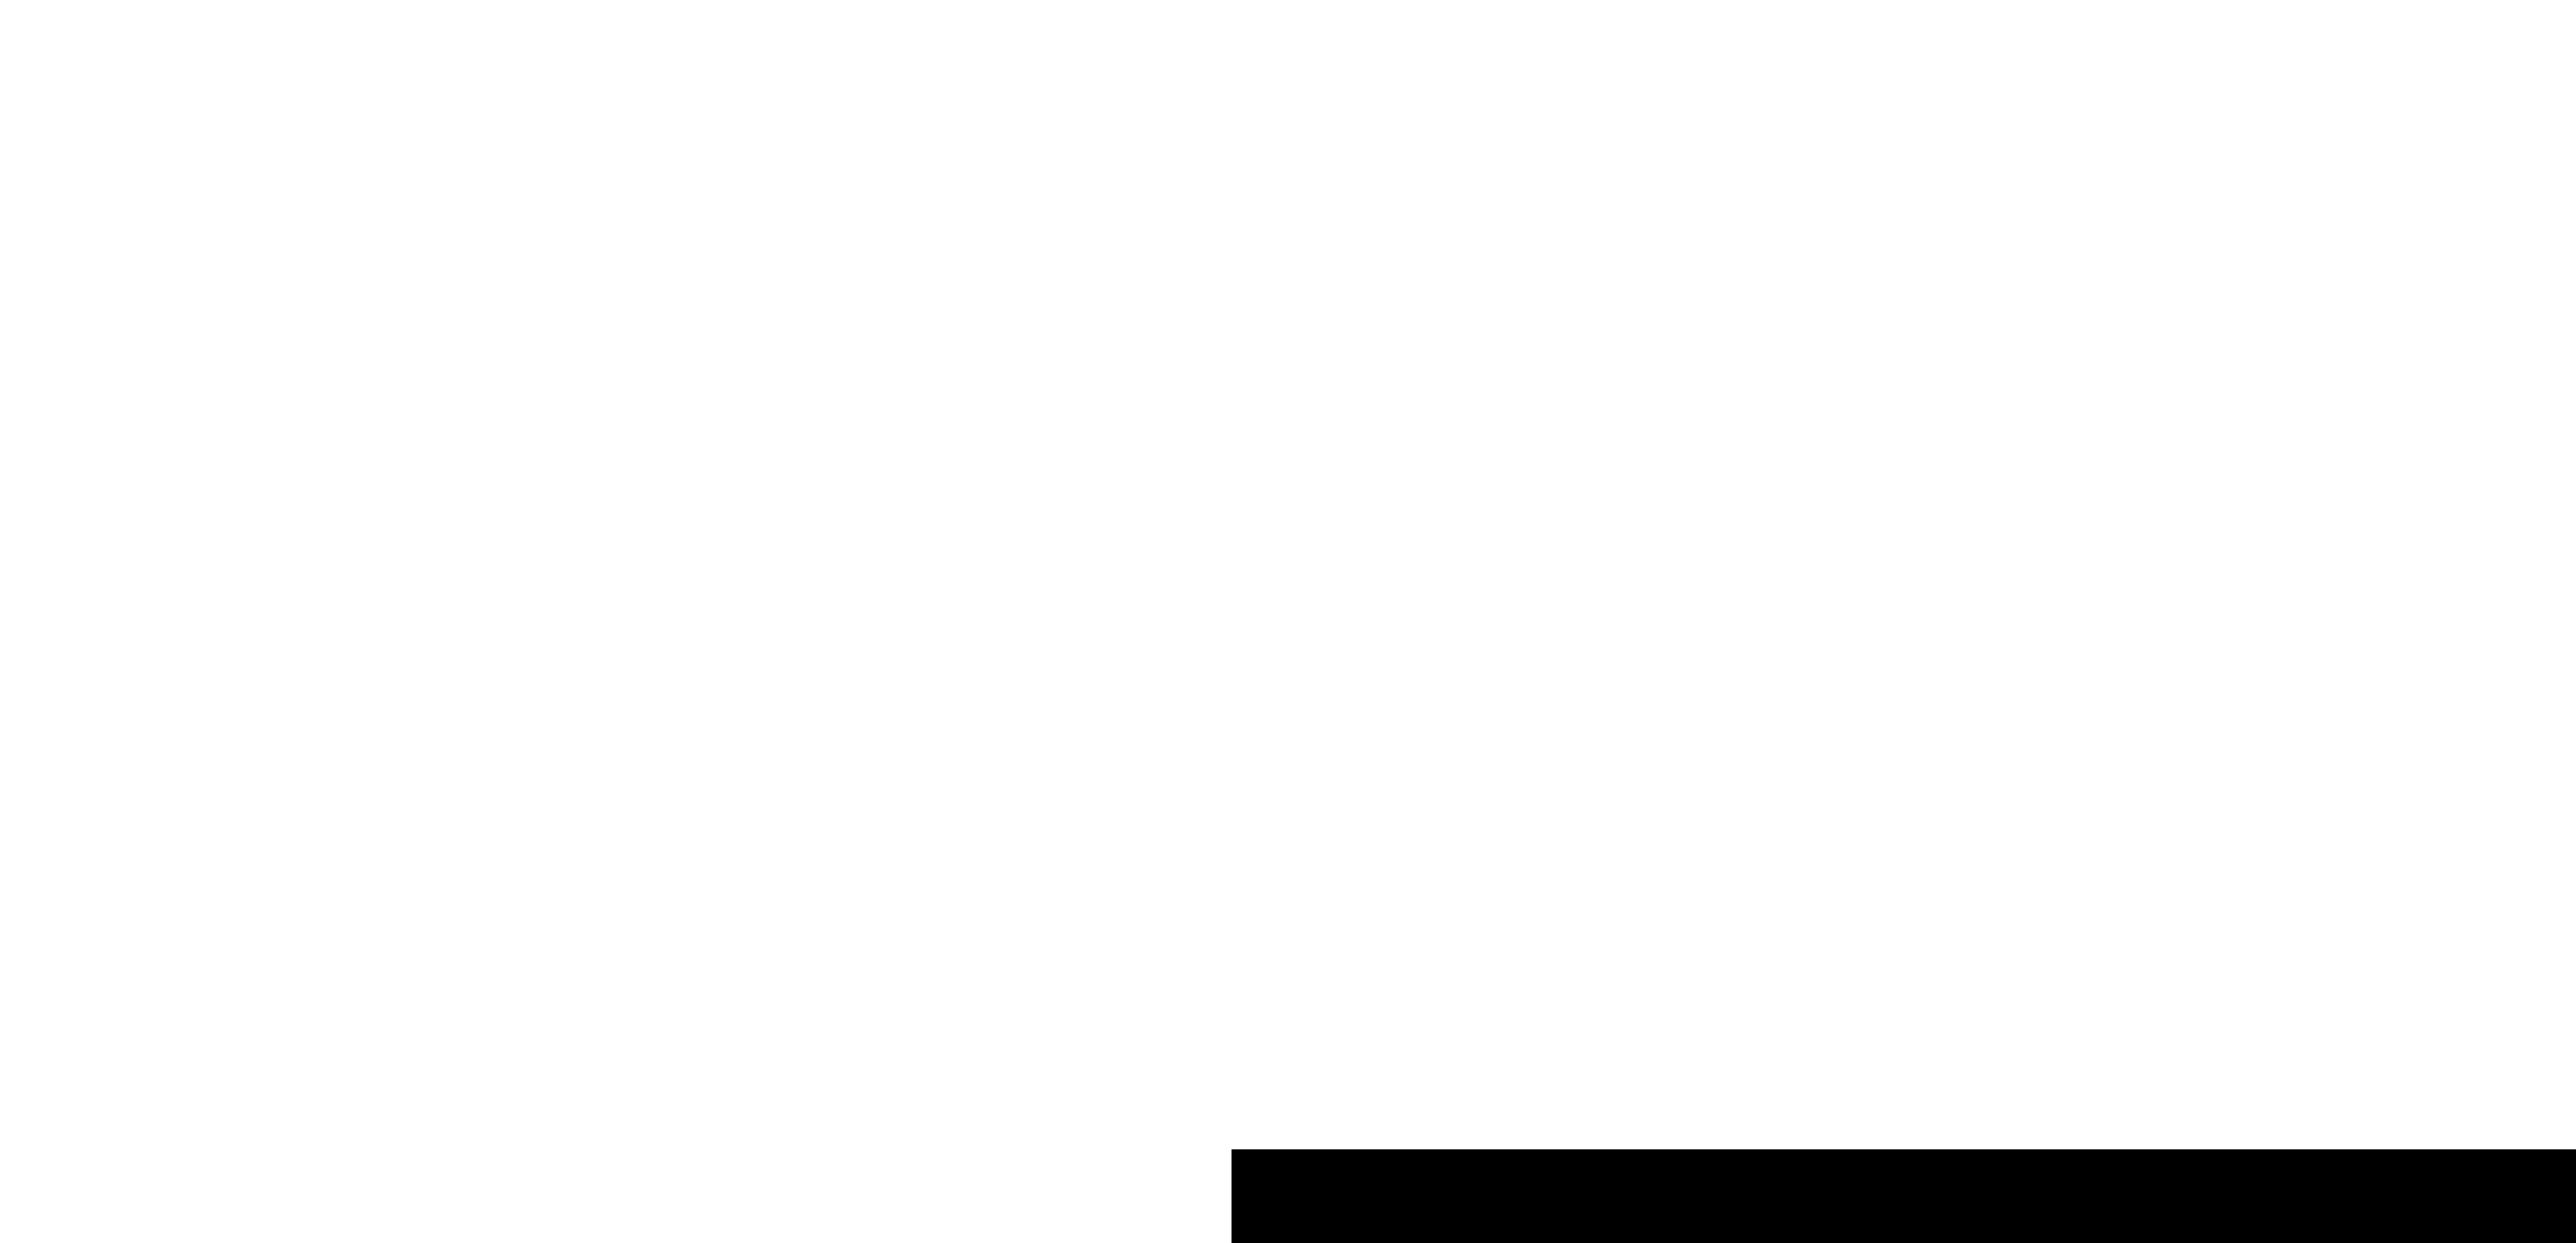

In [12]:
img = Image.open(filenames[0])
Image.fromarray(np.array(img)[:, :, -1])

In [13]:
np.array(img)[:, :, -1]

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0]], dtype=uint8)

[0, 15, 6]
(1540, 3192, 3)
uint8
(2089, 2068, 3)
uint8
(3311, 5779, 3)
uint8


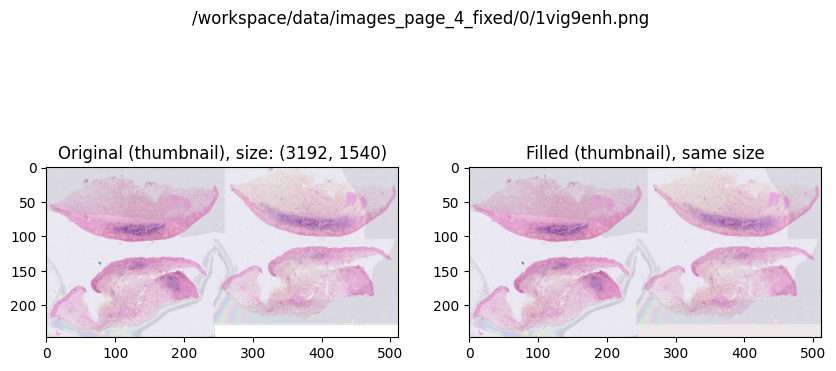

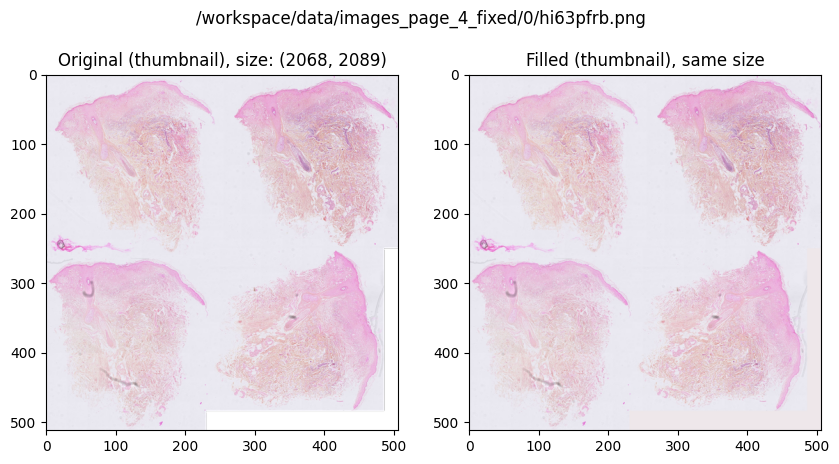

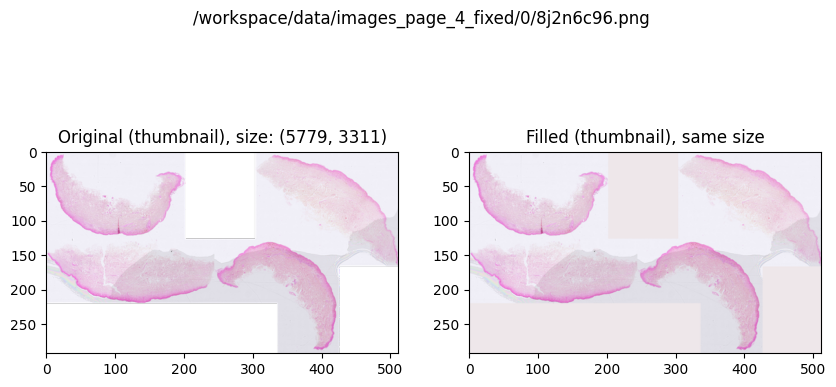

In [21]:
# indices = np.random.choice(len(filenames), 3, replace=False)
indices = [0, 15, 6]
print(indices)

for index in indices:
    # Plot 4 panels: 
    # - original (resized keeping aspect), 
    # - after pre_transform, 
    # - after train_transform, 
    # - after val_transform
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes = axes.flatten()

    img = Image.open(filenames[index])
    img_resized = img.copy()
    img_resized.thumbnail([512, 512], Image.LANCZOS)

    img_filled = img.copy()
    img_filled = np.array(img_filled)
    img_filled = np.where(
        (img_filled[:, :, 3] == 0)[:, :, None],
        np.array(img_mean)[None, None, :],
        img_filled[:, :, :3]
    ).astype(np.uint8)
    img_filled = Image.fromarray(img_filled)
    img_filled_resized = img_filled.copy()
    img_filled_resized.thumbnail([512, 512], Image.LANCZOS)

    fig.suptitle(filenames[index])
    axes[0].imshow(img_resized)
    axes[0].set_title(f'Original (thumbnail), size: {img.size}')
    axes[1].imshow(img_filled_resized)
    axes[1].set_title(f'Filled (thumbnail), same size')